# Linear Regression
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-1.png" style="max-width: 60%; height: auto;">

- 입력(x)과 출력(y)은 <font color=red> $y=Wx+b$ </font> 형태로 나타낼 수 있음.
- 1,2,3 $\dots$ 등의 <font color=red>다양한 $y=Wx+b$ 직선 가능</font>
- training data의 특성을 가장 잘 표시 할 수 있는 <font color=red>가중치(weight) $W$(기울기), 바이어스(bias) $b$(y 절편)</font>을 찾는 것이 학습(Learning)개념. 

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-2.png" style="max-width: 40%; height: auto;">

###### - Training data의 정답$t$과 직선 $y=Wx+b$ 값의 차이인 오차(error)는    
<font color=red>$ error = t - y = t - (Wx+b)$</font>
- Linear regression은 모든 데이터의 오차$(error) = t - y = t - (Wx+b)$의 합이 최소가 되도록 가중치 $W$와 바이어스 $b$값을 결정함.

- <font color=red><b>손실함수(loss function 또는 cost function)</b></font>는 training data의 정답(t)과 계산값(y)의 차이를 모두 합한 수식</font>
- 각각의 오차인 $t-y$ 값이 $(+),(-)$ 모두 가능하기 때문에, 오차의 합이 $0$이 나올 수 있음.
- 따라서,<font color=red> $y=Wx+b \ , \ loss function$으로는 최소 오차를 판단하기 어려움.</font>

- <font color=blue><b>loss function에서 $(error) = (t - y)^2 = (t - (Wx+b))^2$</b></font>를 사용함.
- 오차는 항상 양수이며, 정답과의 차이가 크면 제곱에 의해 오차는 더 커짐.

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-3.png" style="max-width: 60%; height: auto;">

<font size=3>
$ loss \ function $  

$ \displaystyle
=\frac
{(t_1-y_1)^2 + (t_1-y_1)^2 + \dots + (t_n-y_n)^2}
{n}
$
    
$ \displaystyle
=\frac
{[t_1-(Wx_1+b)]^2 + [t_2-(Wx_2+b)]^2 + \dots + [t_n-(Wx_n+b)]^2}
{n}
$

$ \displaystyle
=\frac{1}{n}
\sum^{n}_{i=1}[t_i-(Wx_i + b)]^2
$
</font>

- 손실함수 $ \displaystyle loss \ function = E(W,b) $
- <font color=red> $loss \ function = E(W,b)$가 최소값을 갖도록 $W,b$를 구하는 것이 $(linear) \ regression$의 최종 목적임.</font> 

<br>
<font size=3>
$ \displaystyle
y=Wx+b
$
    
$ \displaystyle loss \ function 
= E(W,b) 
=\frac{1}{n}
\sum^{n}_{i=1}[t_i-(Wx_i + b)]^2
$
</font>

# Gradient decent algorithm (경사하강법)

- 손실함수 (loss function) 계산
- $E(W,b)$ 에서 $bias \ b=0$ 으로 가정

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-4.png" style="max-width: 80%; height: auto;">

   W   E(W)
0 -1  18.70
1  0   4.67
2  1   0.00
3  2   4.67
4  3  18.70


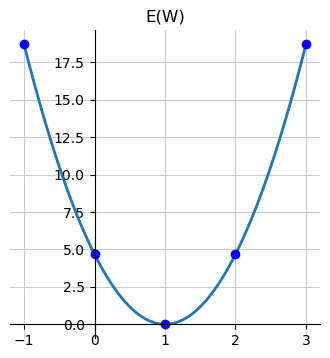

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
data = {
    'W': [-1,0,1,2,3],
    'E(W)': [18.7,4.67,0,4.67,18.7],
}
 
df = pd.DataFrame(data)
print(df)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

x = np.linspace(-1, 3, 1000)
y = 4.67*(x-1)**2
x_data = df['W']
y_data = df['E(W)']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x_data, y_data, 'bo')

plt.title('E(W)')
plt.grid(color='0.8')
ax.spines['left'].set_position(('data',0)) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_position(('data',0)) 


plt.show()

# Gradient decent algorithm (경사하강법) - $W$ 값 구하기

- $ \displaystyle \frac{\partial{E(W)}}{\partial{W}}$ 는 특정 $W$에서의 $E(W)$의 기울기$slope$ 을 의미


- <font color=red> $ \displaystyle \frac{\partial{E(W)}}{\partial{W}}$ 이 양수 $(+)$값</font>을 갖는다면, <font color=red>$W$는 왼쪽</font>으로 이동시켜야 $E(W)$가 감소


- <font color=red> $ \displaystyle \frac{\partial{E(W)}}{\partial{W}}$ 이 음수 $(-)$값</font>을 갖는다면, <font color=red>$W$는 오른쪽</font>으로 이동시켜야 $E(W)$가 감소

<font size=3><b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ \displaystyle W = W - \alpha \frac{\partial{E(W,b)}}{\partial{W}}$
</b></font>


- <font color=red> $\alpha$는 학습율$(learning \ rate)$</font>이라고 하며, $W$값이 감소 또는 증가하는 비율을 나타냄.

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-6.png" style="max-width: 50%; height: auto;">
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-5.png" style="max-width: 60%; height: auto;">

<font size=3>
$ \displaystyle
y=Wx+b
$
    
$ \displaystyle  
E(W,b) 
=\frac{1}{n}
\sum^{n}_{i=1}[t_i-(Wx_i + b)]^2
$

<font color=blue> 손실함수 $E(W,b)$를 최소화하는 $W \ and \ b$   </font>

<br>
<font size=3 color=blue><b>
$ \displaystyle W = W - \alpha \frac{\partial{E(W,b)}}{\partial{W}} \ \ \ \ , \ \ \ \ 
     b = b - \alpha \frac{\partial{E(W,b)}}{\partial{b}}$
</b></font>


# Linear regression using python

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-7.png" style="max-width: 60%; height: auto;">
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-8.png" style="max-width: 60%; height: auto;">

## 1. Training Data 준비

In [2]:
import numpy as np

x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([2,3,4,5,6]).reshape(5,1)


## 2. 임의의 직선 $y=Wx+b$ 정의 (임의의 $W, \ b$ 초기화)


In [3]:
W = np.random.rand(1,1)
b = np.random.rand(1)
print(f"W={W}, W.shape={W.shape}, b={b}, b.shape={b.shape}")

W=[[0.8256598]], W.shape=(1, 1), b=[0.68908592], b.shape=(1,)


## 3. 손실함수 $E(W)$ 정의

In [4]:
def loss_func(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2)/(len(x)))

## 4. 수치미분 numerical_derivative 및 utility 함수 정의

In [6]:
def numerical_derivative(f,x):  
    delta_x = 1e-4
    grad = np.zeros_like(x)  
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) 
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)  
        grad[idx] = (fx1 - fx2)/(2*delta_x)

        x[idx] = tmp_val
        it.iternext()
        
    return grad

def error_val(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2))/(len(x))

def predict(x):
    y=np.dot(x,W)+b
    return y

## 5. 학습율(learning rate) 초기화 및 $W, b$ 업데이트

In [7]:
learning_rate=1e-2

f = lambda x: loss_func(x_data,t_data)  # f(x) = loass_func(x_data,y_data)

print(f"initial error value = {error_val(x_data,t_data)}, initial W = {W}")

for step in range(8001):
    W-= learning_rate*numerical_derivative(f,W)
    b-= learning_rate*numerical_derivative(f,b)
    
    if(step % 400 ==0):
        print(f"step = {step}, error_value = {error_val(x_data,t_data)}, W = {W}, b = {b}")

initial error value = 0.7562360761676125, initial W = [[0.8256598]]
step = 0, error_value = 0.44957478257989336, W = [[0.88266949]], b = [0.70234403]
step = 400, error_value = 0.0007666217775277836, W = [[1.0179799]], b = [0.93510274]
step = 800, error_value = 4.891500165338907e-05, W = [[1.00454169]], b = [0.98360706]
step = 1200, error_value = 3.1210662896461846e-06, W = [[1.00114722]], b = [0.99585917]
step = 1600, error_value = 1.991424809386296e-07, W = [[1.00028979]], b = [0.99895403]
step = 2000, error_value = 1.270646760868696e-08, W = [[1.0000732]], b = [0.99973579]
step = 2400, error_value = 8.107477537488164e-10, W = [[1.00001849]], b = [0.99993326]
step = 2800, error_value = 5.1730499810987217e-11, W = [[1.00000467]], b = [0.99998314]
step = 3200, error_value = 3.300711718042834e-12, W = [[1.00000118]], b = [0.99999574]
step = 3600, error_value = 2.1060492119993605e-13, W = [[1.0000003]], b = [0.99999892]
step = 4000, error_value = 1.3437839147147941e-14, W = [[1.00000008]]

## 6. Linear Regression Code

In [8]:
import numpy as np

x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([2,3,4,5,6]).reshape(5,1)

W = np.random.rand(1,1)
b = np.random.rand(1)
print(f"W={W}, W.shape={W.shape}, b={b}, b.shape={b.shape}")

def loss_func(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2)/(len(x)))

def numerical_derivative(f,x):  
    delta_x = 1e-4
    grad = np.zeros_like(x)  
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) 
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)  
        grad[idx] = (fx1 - fx2)/(2*delta_x)

        x[idx] = tmp_val
        it.iternext()
        
    return grad

def error_val(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2)/(len(x)))
            
def predict(x):
    y=np.dot(x,W)+b
    return y

learning_rate=1e-2

f = lambda x: loss_func(x_data,t_data)  # f(x) = loass_func(x_data,y_data)

print(f"initial error value = {error_val(x_data,t_data)}, initial W = {W}")

for step in range(8001):
    W -= learning_rate*numerical_derivative(f,W)
    b -= learning_rate*numerical_derivative(f,b)
    
    if(step % 400 ==0):
        print(f"step = {step}, error_value = {error_val(x_data,t_data)}, W = {W}, b = {b}")
        
predict(43)

W=[[0.39811734]], W.shape=(1, 1), b=[0.70666491], b.shape=(1,)
initial error value = 5.130255385258174, initial W = [[0.39811734]]
step = 0, error_value = 3.019701265030401, W = [[0.54813163]], b = [0.73964371]
step = 400, error_value = 0.0002737144523357534, W = [[1.0107435]], b = [0.96122207]
step = 800, error_value = 1.7464600251426445e-05, W = [[1.00271379]], b = [0.99020476]
step = 1200, error_value = 1.114344746282679e-06, W = [[1.0006855]], b = [0.99752574]
step = 1600, error_value = 7.110178278883542e-08, W = [[1.00017316]], b = [0.99937501]
step = 2000, error_value = 4.536714093713078e-09, W = [[1.00004374]], b = [0.99984213]
step = 2400, error_value = 2.894691801153872e-10, W = [[1.00001105]], b = [0.99996012]
step = 2800, error_value = 1.846984502495745e-11, W = [[1.00000279]], b = [0.99998993]
step = 3200, error_value = 1.1784853055207133e-12, W = [[1.0000007]], b = [0.99999746]
step = 3600, error_value = 7.519432994604196e-14, W = [[1.00000018]], b = [0.99999936]
step = 40

array([[44.]])

## 7. Multi-variable Linear Regression Code

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/8-9.png" style="max-width: 60%; height: auto;">

In [8]:
import numpy as np

loaded_data = np.loadtxt('./data08.csv', delimiter=',', dtype=np.float32)

x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:,[-1]]

# print(x_data, x_data.shape)
# print(y_data, y_data.shape)

W = np.random.rand(3,1)
b = np.random.rand(1)
print(f"W={W}, W.shape={W.shape}, b={b}, b.shape={b.shape}")

def loss_func(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2)/(len(x)))

def numerical_derivative(f,x):  
    delta_x = 1e-4
    grad = np.zeros_like(x)  
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) 
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)  
        grad[idx] = (fx1 - fx2)/(2*delta_x)

        x[idx] = tmp_val
        it.iternext()
        
    return grad

def error_val(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2)/(len(x)))
            
def predict(x):
    y=np.dot(x,W)+b
    return y

learning_rate=1e-5

f = lambda x: loss_func(x_data,t_data)  # f(x) = loass_func(x_data,y_data)

print(f"initial error value = {error_val(x_data,t_data)}, initial W = {W}")

for step in range(10001):
    W -= learning_rate*numerical_derivative(f,W)
    b -= learning_rate*numerical_derivative(f,b)
    
    if(step % 400 ==0):
        print(f"step = {step}, error_value = {error_val(x_data,t_data)}, W = {W}, b = {b}")

test_data = np.array([100,98,81])
predict(test_data)

W=[[0.49810543]
 [0.18676845]
 [0.96711368]], W.shape=(3, 1), b=[0.46996304], b.shape=(1,)
initial error value = 844.9252523591153, initial W = [[0.49810543]
 [0.18676845]
 [0.96711368]]
step = 0, error_value = 317.32009982277776, W = [[0.54427499]
 [0.23332852]
 [1.01467774]], b = [0.47030963]
step = 400, error_value = 7.474847132627126, W = [[0.59160902]
 [0.33235413]
 [1.08590656]], b = [0.47016018]
step = 800, error_value = 7.214340597816979, W = [[0.56948084]
 [0.3557807 ]
 [1.0845277 ]], b = [0.4694718]
step = 1200, error_value = 7.0089048715743045, W = [[0.54941127]
 [0.37621057]
 [1.08407656]], b = [0.46878374]
step = 1600, error_value = 6.846198702947882, W = [[0.53121202]
 [0.39405401]
 [1.08433522]], b = [0.46809513]
step = 2000, error_value = 6.716824233100628, W = [[0.51471148]
 [0.40966185]
 [1.08512763]], b = [0.4674053]
step = 2400, error_value = 6.613581981622946, W = [[0.49975335]
 [0.42333449]
 [1.08631214]], b = [0.46671378]
step = 2800, error_value = 6.530924187020

array([179.07968417])